Experiment with  Neural Networks on the Fashion MNIST dataset . 

According to their [ github page](https://github.com/zalandoresearch/fashion-mnist) , the Fashion MNIST  aims to replace the classic MNIST dataset, which is quite overused and not complex enough for modern algorithms. It consists of  70,000  grayscale images of clothing items , 60,000 for the training set and 10,000 for the test set.

There are 10 clothing categories and each article is a 28 by 28 pixels image. 

First a simple NN is trained  inspired by this [TensorFlow turorial](https://www.tensorflow.org/tutorials/keras/basic_classification ), following by  a CNN, to compare the accuracy of each model.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

Using TensorFlow backend.


In [0]:
# Import and load fashion MNIST data direclty from Keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Exploratory data analysis

In [3]:
# Explore dataset

print("Training set: ", train_images.shape)
print("Test set: ", test_images.shape)


Training set:  (60000, 28, 28)
Test set:  (10000, 28, 28)


Each label is an integer (0-9) and corresponds to a class (a category of clothing). The names of the classes can be found here: https://github.com/zalandoresearch/fashion-mnist 

The class names are not included  in the dataset so we need to define them:

In [0]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

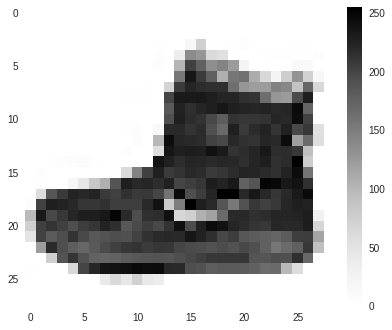

In [5]:
# Check image shape and range of values

train_images.shape[0]

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

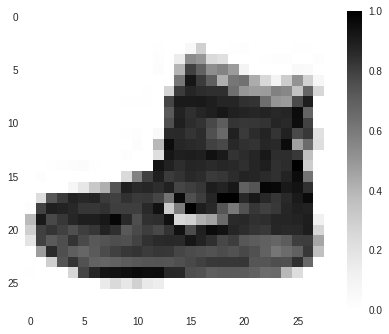

In [6]:
# Data normalization


train_images = train_images.astype('float32') / 255.0

test_images = test_images.astype('float32') / 255.0

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


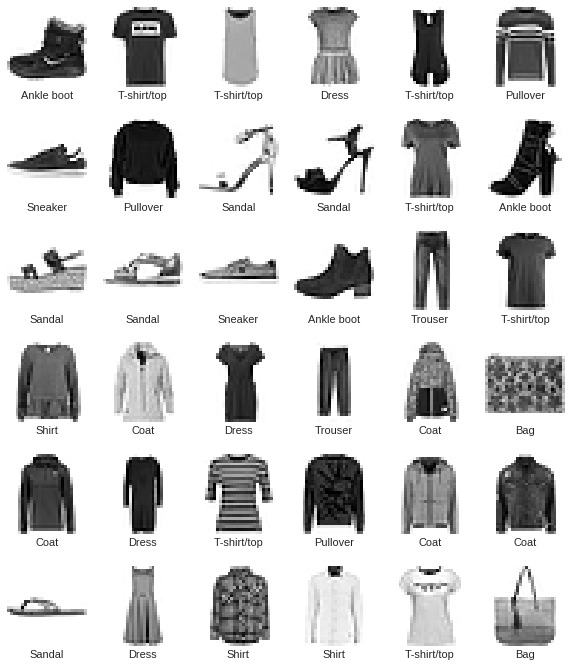

In [7]:
# Display the first 36 images with the corresponding label

plt.figure(figsize=(10,12))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(classes[train_labels[i]])
plt.show()

In [8]:
# Create a simple NN and set-up layers

simpleNNmodel = keras.Sequential([
    
    # This layer transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels.
    # It has no parameters to learn, it only reformats the data (unstacking rows of pixels in the image and lining them up.)
    keras.layers.Flatten(input_shape=(28, 28)),
    
    # The following are densely-connected, or fully-connected, neural layers. 
   
    # The first Dense layer has 128 nodes (or neurons). Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.
    # ReLU, or Rectified Linear Activation, is used as an activation function since it has been proven to work well in neural networks.

    keras.layers.Dense(128, activation=tf.nn.relu),
    
    # The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. 
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

simpleNNmodel.summary()




Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Create reshaped copy data to fit into the CNN model

train_X = train_images.reshape(60000,28,28,1)
test_X = test_images.reshape(10000,28,28,1)


# Create a simple CNN and set-up layers


# The Conv2D layers are convolution layers that will deal with the input images, which are 2-dimensional matrices.
# The first Conv2D layer has 64 nodes and  the second 32.
# Kernel size is the size of the filter matrix for our convolution, here kernel size 2 means a 2x2 filter matrix.


simpleCNNmodel = Sequential()

simpleCNNmodel.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
simpleCNNmodel.add(MaxPooling2D(pool_size=2))
simpleCNNmodel.add(Dropout(0.3))

simpleCNNmodel.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
simpleCNNmodel.add(MaxPooling2D(pool_size=2))
simpleCNNmodel.add(Dropout(0.3))

simpleCNNmodel.add(Flatten())
simpleCNNmodel.add(Dense(256, activation='relu'))
simpleCNNmodel.add(Dropout(0.5))
simpleCNNmodel.add(Dense(10, activation='softmax'))

# Take a look at the model summary
simpleCNNmodel.summary()


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 32)          0         
___________________________

In [0]:
# Compile the models


simpleNNmodel.compile(
              # Optimizer: how the model is updated based on the data it sees and its loss function.
              optimizer='adam',
              
              # Loss function: measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.
              loss='sparse_categorical_crossentropy', 
              
              # Metrics: monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified.
              metrics=['accuracy'])


simpleCNNmodel.compile(
    
              optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])




In [11]:
# Start training the models

simpleNNmodel.fit(train_images, train_labels, validation_data=(test_images, test_labels), epochs=5 )
simpleCNNmodel.fit(train_X, train_labels, batch_size=64, validation_data=(test_X, test_labels), epochs=5 )

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 133us/sample - loss: 0.5005 - acc: 0.8254 - val_loss: 0.4373 - val_acc: 0.8468
Epoch 2/5
60000/60000 [==============================] - 8s 129us/sample - loss: 0.3765 - acc: 0.8644 - val_loss: 0.4181 - val_acc: 0.8511
Epoch 3/5
60000/60000 [==============================] - 8s 128us/sample - loss: 0.3377 - acc: 0.8770 - val_loss: 0.3708 - val_acc: 0.8655
Epoch 4/5
60000/60000 [==============================] - 8s 137us/sample - loss: 0.3137 - acc: 0.8851 - val_loss: 0.3766 - val_acc: 0.8648
Epoch 5/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.2971 - acc: 0.8909 - val_loss: 0.3443 - val_acc: 0.8763
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 104s 2ms/step - loss: 0.6188 - acc: 0.7707 - val_loss: 0.4140 - val_acc: 0.8541
Epoch 2/5
60000/6000

In [12]:
train_loss, train_acc = simpleNNmodel.evaluate(train_images, train_labels)

print('NN train accuracy:', train_acc)

train_loss, train_acc = simpleCNNmodel.evaluate(train_X, train_labels)

print('CNN train accuracy:', train_acc)

60000/60000 [==============================] - 2s 40us/sample - loss: 0.2647 - acc: 0.9011
NN train accuracy: 0.90108335
60000/60000 [==============================] - 22s 367us/step
CNN train accuracy: 0.9130333333333334


In [13]:
# Evaluate accuracy on the test dataset

test_loss, test_acc = simpleNNmodel.evaluate(test_images, test_labels)

print('NN test accuracy:', test_acc)

test_loss, test_acc = simpleCNNmodel.evaluate(test_X, test_labels)

print('CNN test accuracy:', test_acc)



10000/10000 [==============================] - 0s 42us/sample - loss: 0.3443 - acc: 0.8763
NN test accuracy: 0.8763
10000/10000 [==============================] - 4s 362us/step
CNN test accuracy: 0.9001


A gap between training accuracy and test accuracy in the simple NN model can be noticed. This is an example of overfitting. Overfitting is when a machine learning model performs worse on new data than on their training data.

In [0]:
# Once the model is trained, we can make predictions

predictionsNN = simpleNNmodel.predict(test_images)
predictionsCNN = simpleCNNmodel.predict(test_X)

In [15]:
# A prediction is an array of 10 numbers. These describe the "confidence" of the model that the image corresponds to each of the 10 different articles of clothing.

print("For the first image of the test set, return the confidence that the item belongs to each of the 10 classes:\n", predictionsNN[0])


For the first image of the test set, return the confidence that the item belongs to each of the 10 classes:
 [5.7508969e-06 2.8693739e-08 1.8543561e-07 5.4674793e-08 2.3715654e-07
 7.1726488e-03 4.6910446e-07 2.1261912e-02 8.8073182e-05 9.7147059e-01]


In [16]:
# We can see which label has the highest confidence value

print("Predicted label is:", classes[np.argmax(predictionsNN[0])])

# Check is the predicted label corresponds to the true label

print ("True label is:",classes[test_labels[0]])

Predicted label is: Ankle boot
True label is: Ankle boot


In [0]:
# Visualize predictions

green = '#4FC67C'
red = '#DB6B62'

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = green
  else:
    color = red
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color(red)
  thisplot[true_label].set_color(green) 

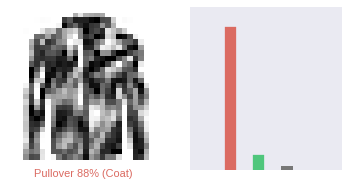

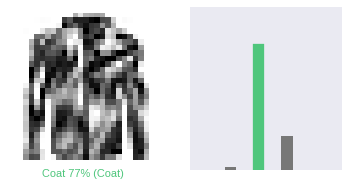

In [18]:
# Predict again for an image

i = 17
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictionsNN, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictionsNN,  test_labels)
plt.show()


plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictionsCNN, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictionsCNN,  test_labels)
plt.show()





Predictions using a simple Neural Network


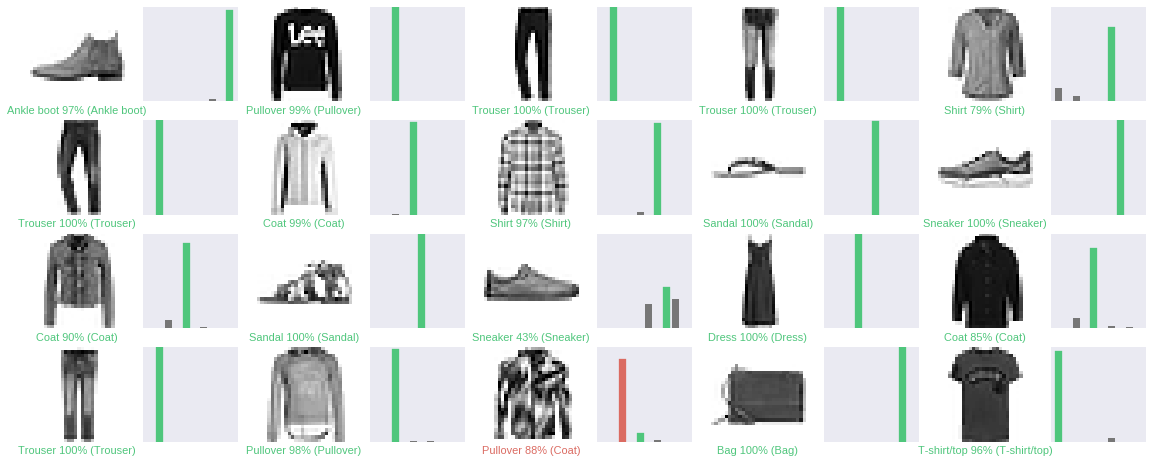

Precitions using a simple Convolutional Neural Network


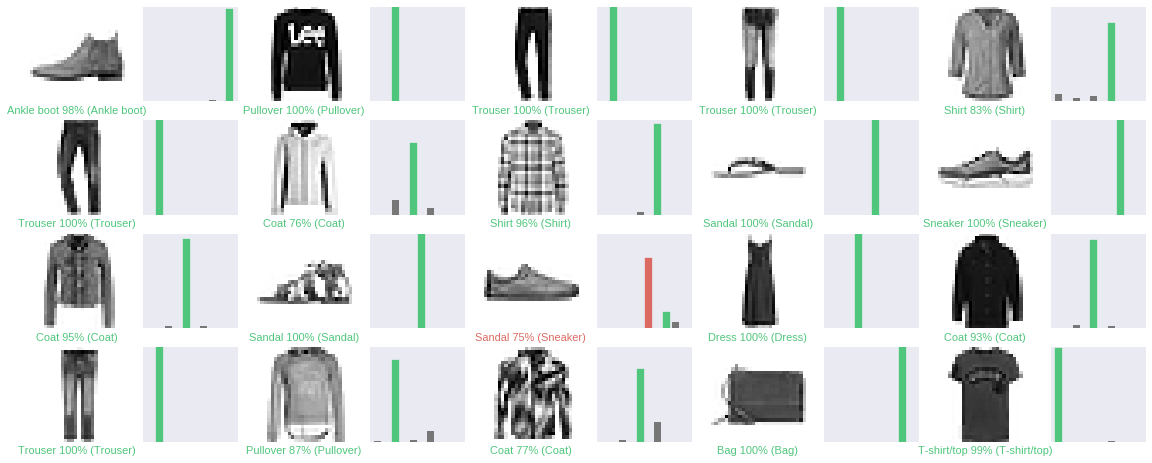

In [19]:
# Plot the first 20 test images, their predicted label, and the true label for each model
# Color correct predictions in green, incorrect predictions in red

num_rows = 4
num_cols = 5
num_images = num_rows*num_cols

print("Predictions using a simple Neural Network")
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionsNN, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionsNN, test_labels)

plt.show()

print("Precitions using a simple Convolutional Neural Network")


plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictionsCNN, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictionsCNN, test_labels)
plt.show()

(1, 28, 28)
(1, 28, 28, 1)


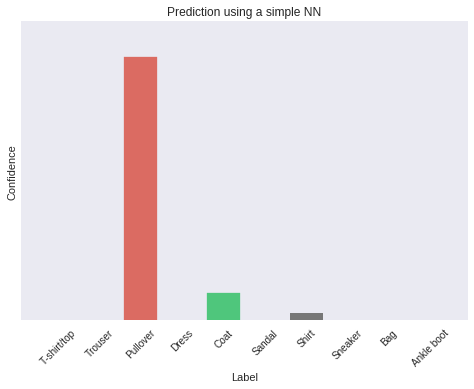

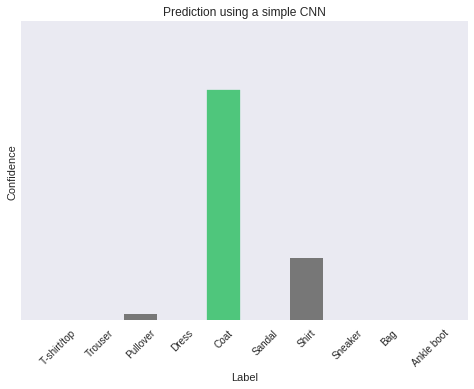

True label is: Coat


In [20]:
# Make prediction about a single image

i = 17

img = test_images[i]
imgx = test_X[i]

# Even though we're using a single image, we need to add it to a list because tf.keras models are optimized to make predictions on a batch, or collection, of examples at once.
# Here we add the image to a batch where it's the only member

img = (np.expand_dims(img,0))
imgx = (np.expand_dims(imgx,0))

print(img.shape)
print(imgx.shape)

# Predict

predictionNN = simpleNNmodel.predict(img)
predictionCNN = simpleCNNmodel.predict(imgx)


# Plot

plt.title("Prediction using a simple NN")
plt.ylabel("Confidence")
plt.xlabel("Label")
plot_value_array(i, predictionsNN, test_labels)
plt.xticks(range(10), classes, rotation=45)
plt.show()

plt.title("Prediction using a simple CNN")
plt.ylabel("Confidence")
plt.xlabel("Label")
plot_value_array(i, predictionsCNN, test_labels)
plt.xticks(range(10), classes, rotation=45)
plt.show()
# We can see which label has the highest confidence value


print ("True label is:", classes[test_labels[i]])


